### The dataset Pclass' column contains a number which indicates class of the passenger's ticket: 1 for first class, 2 for second class and 3 for third class.This could function as a proxy for the socio-economic status of the passenger ('upper', 'middle', 'low'). The 'SibSp' column contains the number of siblings + spouses of the passenger also aboard the Titanic; The 'ParCh' column indicates the number of parents + children of the passenger also aboard the Titanic. The 'Ticket' column contains the ticket numbers of passengers (which are not likely to have any predictive power regarding survival); 'Cabin' contains the cabin number of the passenger, if he/she had a cabin, and lastly,'Embarked' indicates the port of embarkation of the passenger: Cherbourg, Queenstown or Southampton.

The whole goal is building a model that would predict the survival probability of a person, given their basic features.


In [1]:
import pandas as pd
import numpy as np


In [2]:
titanic = pd.read_excel('D:/OneDrive/Desktop/Python Projects/Course/Titanic Dataset.xlsx')

In [3]:
titanic.head()
#Classification Problem

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [4]:
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [5]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [6]:
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passengers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in third class 24.236252545824847


In [7]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [9]:

# Those who did not survive rates
children_not_survived = 100 * np.mean(titanic['Survived'][titanic['Age'] < 18] == 0)
adults_not_survived = 100 * np.mean(titanic['Survived'][titanic['Age'] >= 18] == 0)

print('% of children who did NOT survive:', round(children_not_survived, 2))
print('% of adults who did NOT survive:', round(adults_not_survived, 2))


% of children who did NOT survive: 46.02
% of adults who did NOT survive: 61.9


# Data Pre-processing Non numeric features to numeric


In [10]:
#We are going to use a decision tree model. The model requires only numeric values, but one of our features is 
#categorical: "female" or "male". this can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [11]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
#Understanding lambda functtion:
   # A lambda function in Python is a small anonymous function — basically a shortcut for writing simple functions.
#The lambda function is equivalent below:

#def fun(x):
if x == 'male':
return 1
else:
return 0



In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age'])) #Imputation 

In [14]:

# L frequency of each values in 'Embarked'
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
# Imputation with mode - Categorical variable.
titanic.Embarked.fillna(value='S', axis = 0, inplace = True) #rowwise input 

C:\Users\gland\AppData\Local\Temp\ipykernel_4792\626084772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Embarked.fillna(value='S', axis = 0, inplace = True) #rowwise input


In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
#Omit irrelevant columns

titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]


# Separating input variables (X) and target variable (y)

In [19]:
X = titanic.drop('Survived', axis = 1) #X = are the input/variables, we therefore drop the target
y = titanic['Survived'] #Y  is the target


## Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Building ML Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluate the model


In [25]:
# This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers

!pip install graphviz

from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

#he accuracy function evaluates how well the model's predictions align with the actual outcomes — using y_train or y_test as the ground truth and comparing them to classifier.predict(X_train) or classifier.predict(X_test).

#The noticeable gap between the training accuracy and the test accuracy suggests that the model is overfitting. Instead of learning general patterns that apply to new, unseen data, the model is essentially memorizing the training data. As a result, it achieves very high accuracy on the training set (around 98%) but performs significantly worse on the test set.

#This issue becomes even more apparent when we visualize the decision tree. The next section of code will generate that visualization — it won’t be explained in detail, but think of it as a handy "magic trick" to help us see how the tree works.

Training accuracy... 0.9798657718120806
Test accuracy 0.752542372881356


In [26]:
from sklearn.tree import export_graphviz
import graphviz

In [35]:
dot_data= export_graphviz(model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [36]:
graph1=graphviz.Source(dot_data)

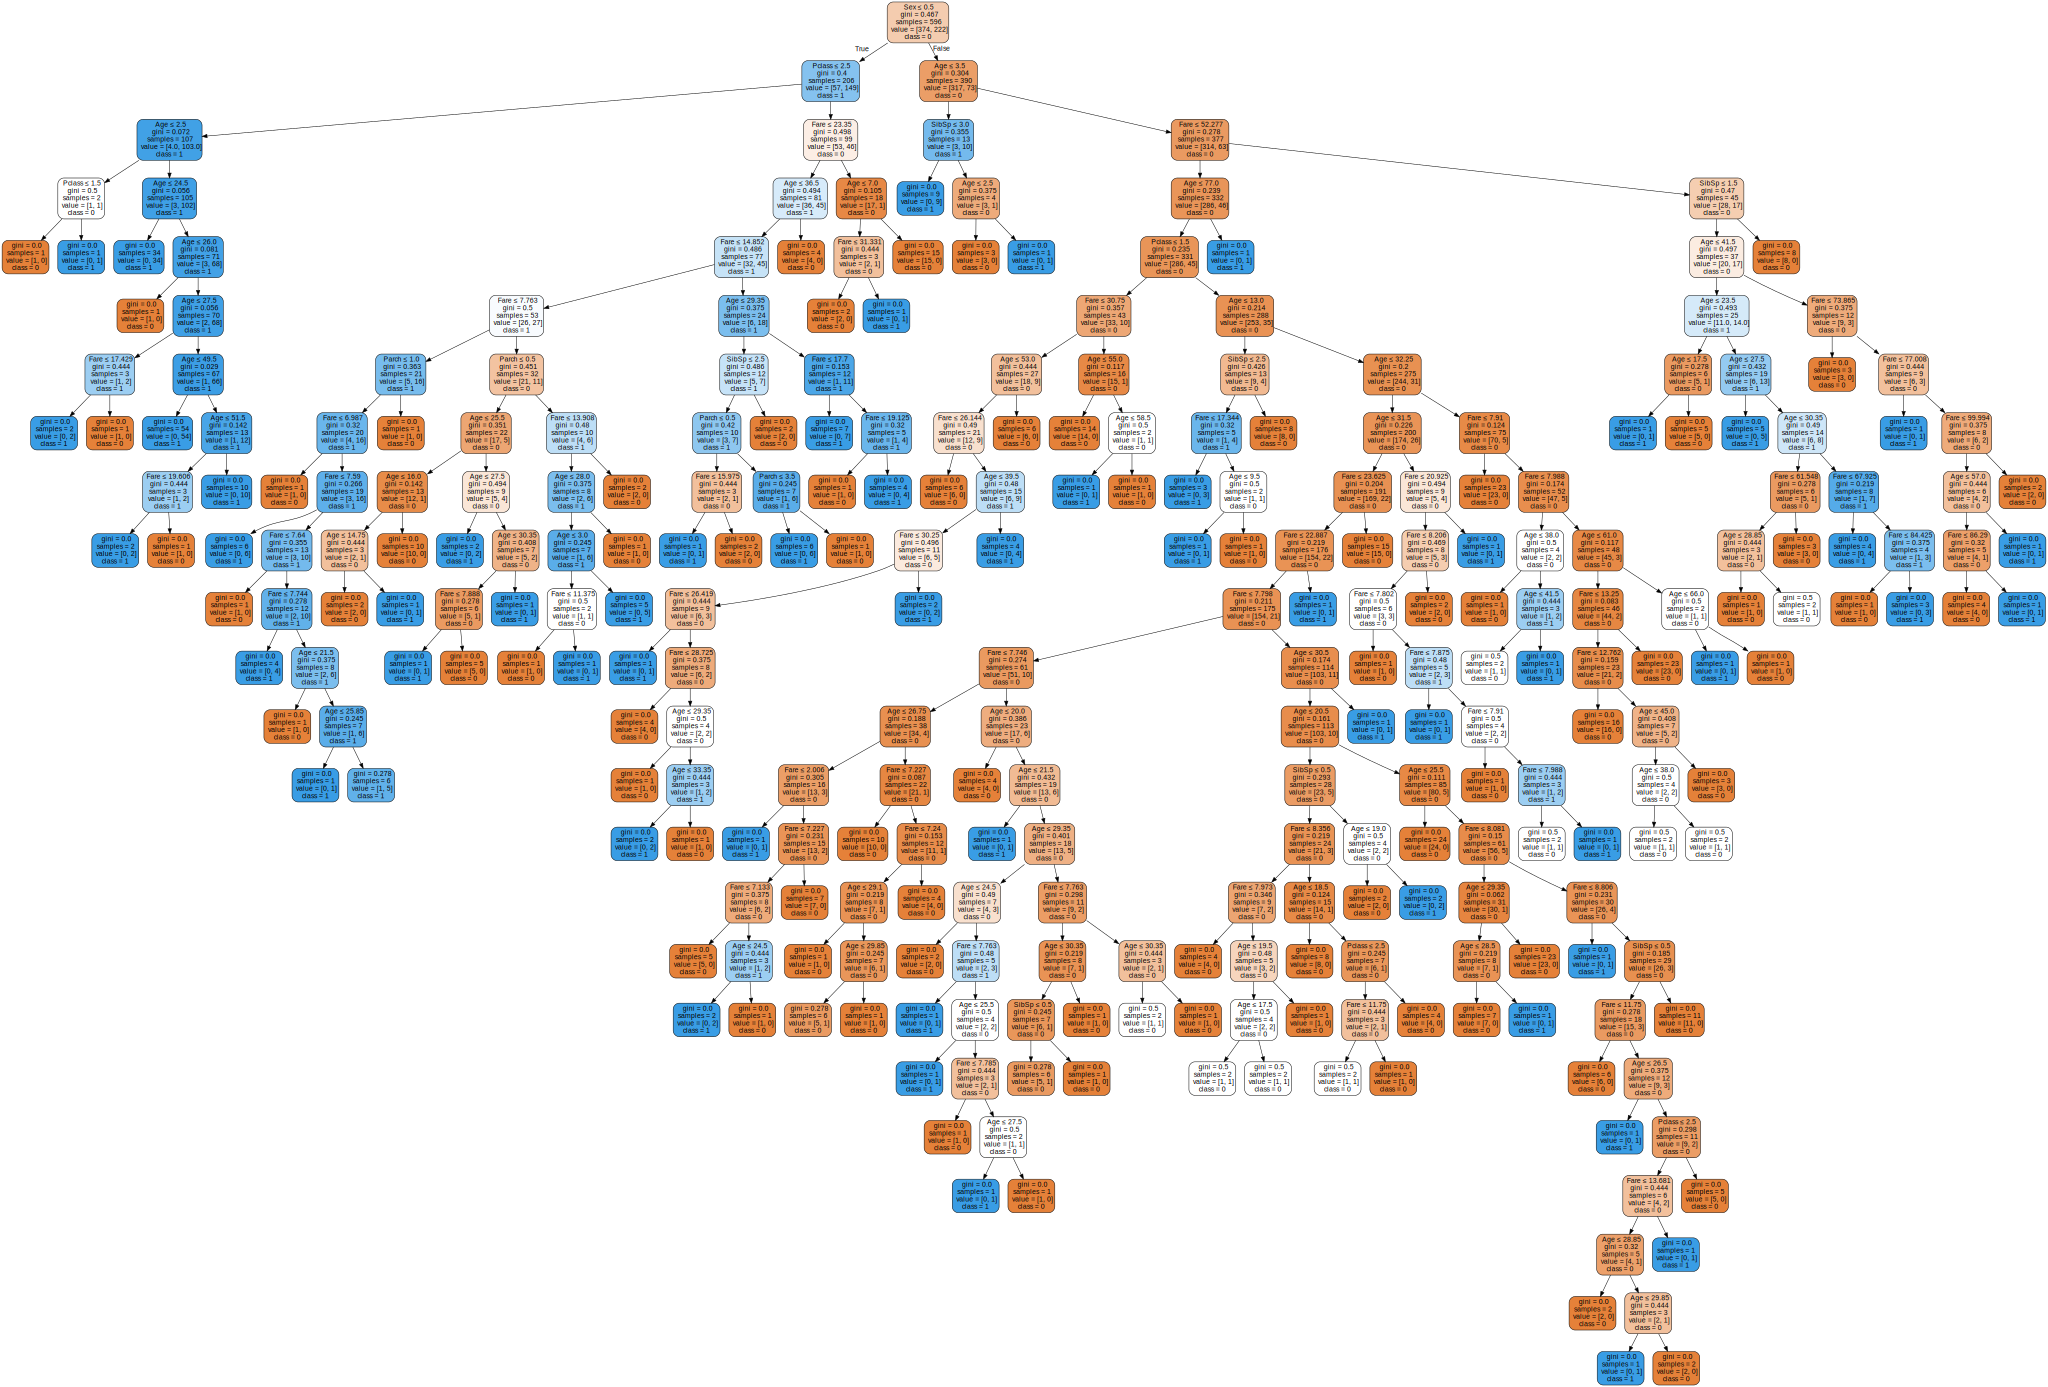

In [37]:
graph1

# Improve the model - One way to reduce overfitting is by restricting how many splits or "questions" the decision tree is allowed to make. Since each node in the tree represents a question, limiting the depth of the tree effectively limits the number of questions it can ask. So now, let's create a new instance of a decision tree classifier, but this time we’ll restrict its maximum depth to 3 — meaning the tree can’t grow beyond three levels (or ask more than 3 sequential questions).

In [31]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))
#We observe that although the training accuracy has decreased, the test accuracy has improved and is now nearly equal 
#to the training accuracy. This indicates that the model is no longer overfitting as much. Achieving 82% accuracy with such a 
#simple model is good

train score... 0.8238255033557047
test score... 0.8203389830508474


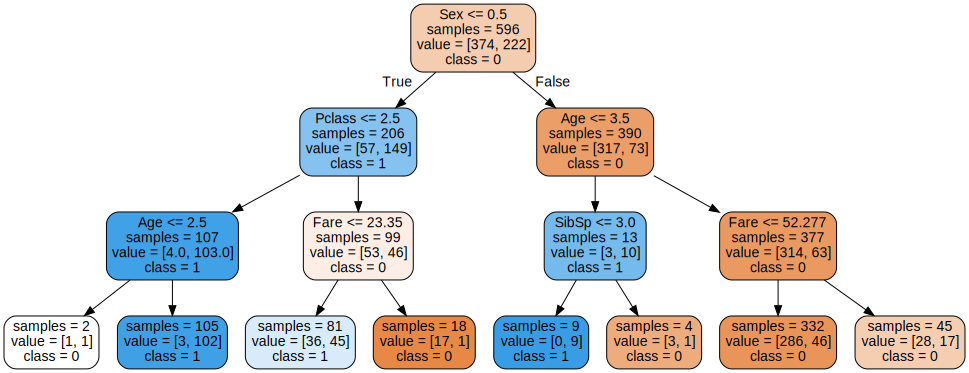

In [34]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)
graph2=graphviz.Source(dot_data)
graph2

#Training is the process where the model identifies the most significant features and uses them to split the data effectively. 
#In this case, the algorithm determined that Sex is the most influential factor. For females, Class plays a key role, while for males, Age becomes more important.

#In the visualization, the bluer the node, the higher the survival rate — whereas browner nodes indicate a lower survival rate.
